In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
import pandas
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

# For producing decision tree diagrams.
from IPython.core.display import Image, display
from sklearn.externals.six import StringIO


/Users/amitbhattacharyya/.virtualenvs/datascience3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
?LinearRegression

In [3]:
# load the boston housing data
boston = load_boston()
X, Y = boston.data, boston.target

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
train_data, train_labels = X[:350], Y[:350]
test_data, test_labels = X[350:], Y[350:]

In [4]:
print (len(train_data), len(test_data))

350 156


In [5]:
df_boston = pandas.DataFrame(X, columns=boston.feature_names)
df_boston['PRICE'] =  boston.target
df_target = pandas.DataFrame(boston.target)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,24.0
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,21.6
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,34.7
3,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,33.4
4,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,36.2
5,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,28.7
6,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,22.9
7,0.06151,0.0,5.19,0.0,0.515,5.968,58.5,4.8122,5.0,224.0,20.2,396.90,9.29,27.1
8,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64,16.5
9,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e515e48>,
      dtype=object)

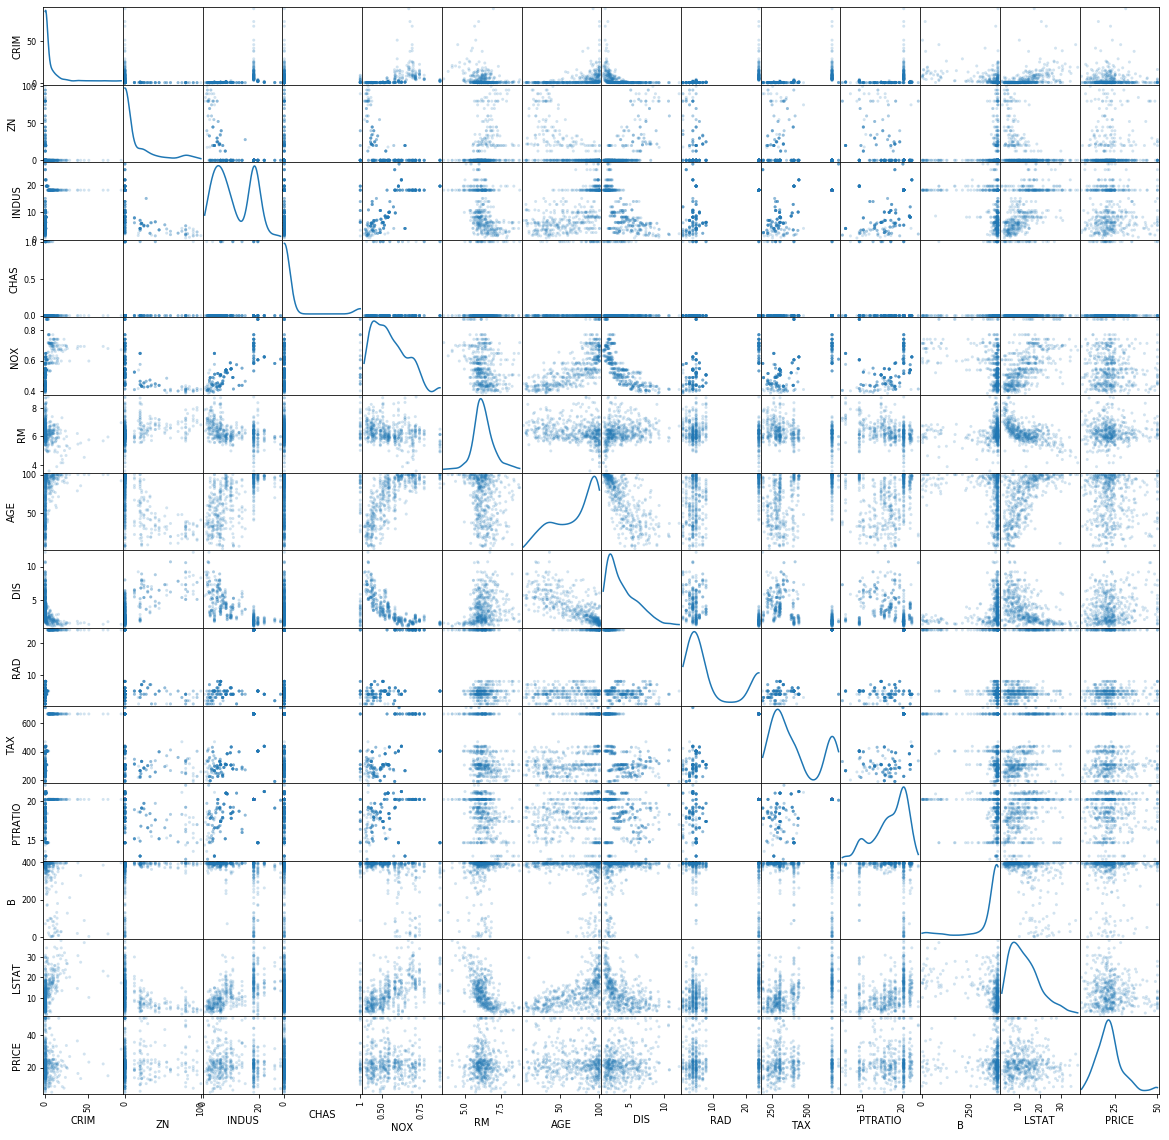

In [6]:
scatter_matrix(df_boston, alpha=0.2, figsize=(20, 20), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125fdfba8>]],
      dtype=object)

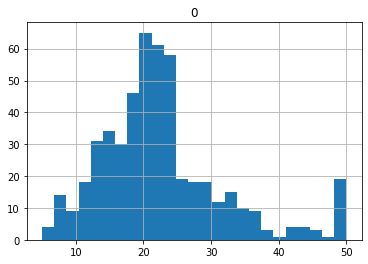

In [7]:
# check out just the home prices
df_target.hist(bins=25)

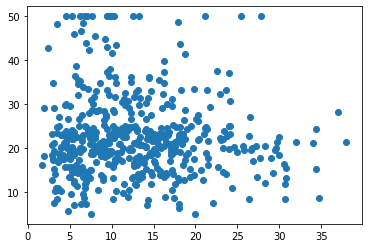

In [9]:
# plot rooms in house vs home price
plt.scatter(df_boston.LSTAT, df_boston.PRICE)

## setup and run regression

In [10]:
len(train_labels)

350

In [11]:
train_labels

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8, 26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4,
       41.3, 17.2, 27.1, 20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5,
       12.3, 19.4, 21.2, 20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5,
       13.6, 17.4,  8.4, 35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2,
       25. , 24.1, 16.6, 32.9, 36.2, 11. ,  7.2, 22

In [12]:
lr_model = LinearRegression()
lr_model.fit(train_data, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lr_model.intercept_, lr_model.coef_

(34.35267294573377,
 array([-1.02107329e-01,  3.99278742e-02,  1.74870910e-02,  1.08772261e+00,
        -1.71636319e+01,  3.93137958e+00,  9.14939831e-04, -1.34374341e+00,
         3.85266874e-01, -1.65249144e-02, -8.86321812e-01,  9.74793769e-03,
        -4.99076593e-01]))

In [ ]:
test_labels


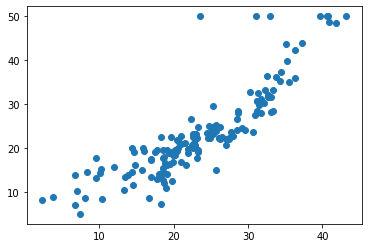

In [14]:
predicted_test_values = lr_model.predict(test_data)
plt.scatter(predicted_test_values, test_labels)

In [15]:
# what is R^2 of our fit?
lr_model.score(test_data, test_labels)

0.7518083416402185

In [18]:
import numpy as np
np.mean(np.abs(predicted_test_values - test_labels))

3.448622575774336

In [ ]:
?lr_model.score